In [1]:
import tkinter as tk
from tkinter import filedialog
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


In [15]:
root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

In [16]:
data = pd.read_csv(file_path)

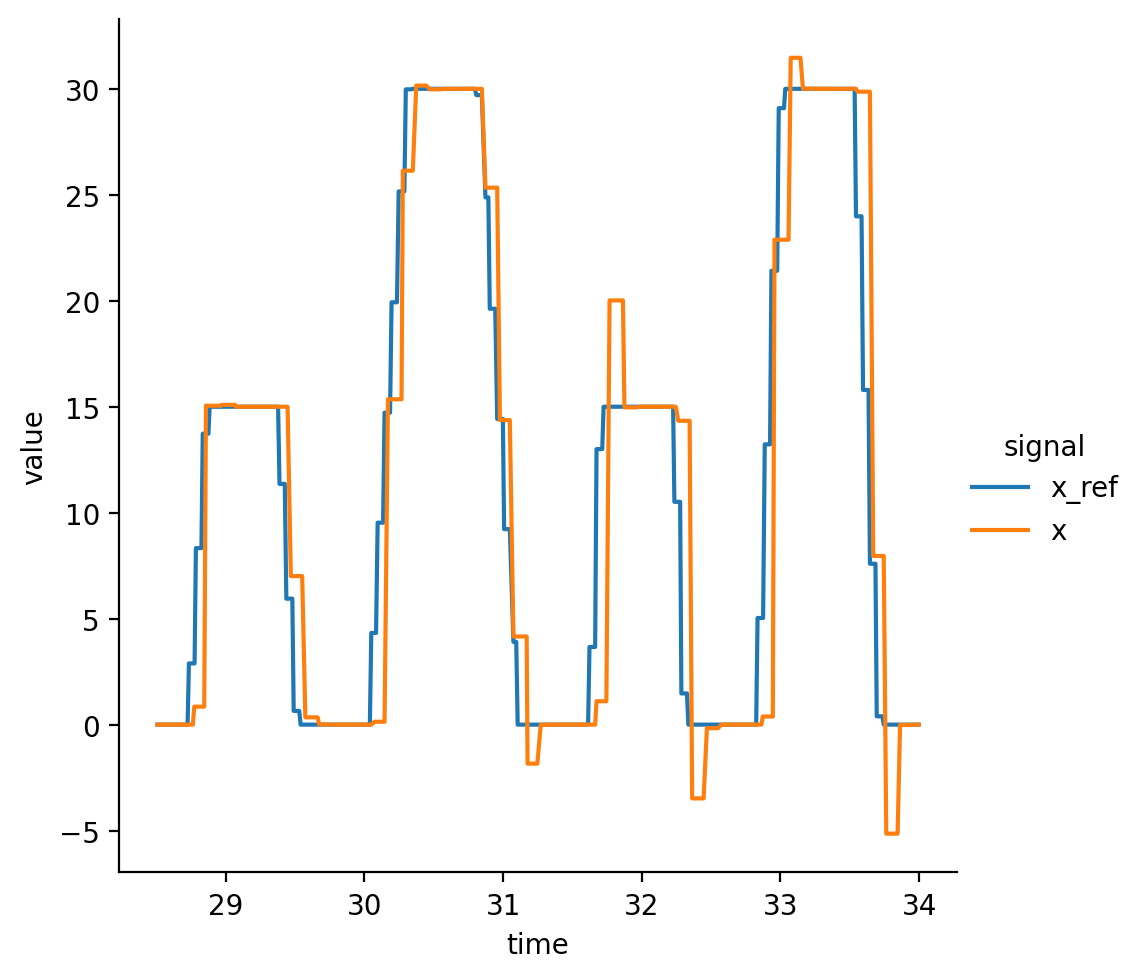

In [19]:
a4_dims = (11.7, 8.27)
p = sns.relplot(data=data.loc[((data['signal'] == 'x') | (data['signal'] == 'x_ref')) & (data['time'] > 28.5) & (data['time'] < 34)], kind="line", x='time', y='value', hue='signal')
p.fig.set_dpi(200)

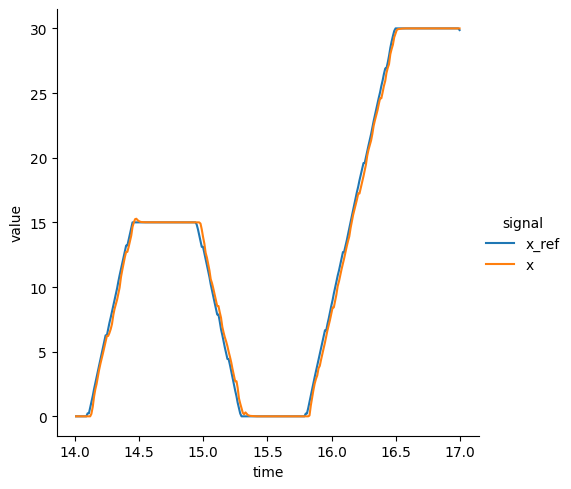

In [7]:
a4_dims = (11.7, 8.27)
p = sns.relplot(data=data.loc[((data['signal'] == 'x') | (data['signal'] == 'x_ref')) & (data['time'] > 14) & (data['time'] < 17)], kind="line", x='time', y='value', hue='signal')
ax = p.axes[0,0]

In [8]:
data.query("signal in ('x','z')")

,Unnamed: 0,time,signal,value
1,1,0.000000,x,0.0
3,3,0.000000,z,0.0
10,10,0.007569,x,0.0
12,12,0.007569,z,0.0
19,19,0.018339,x,0.0
...,...,...,...,...
31575,31575,35.077985,z,0.0
31582,31582,35.087746,x,0.0
31584,31584,35.087746,z,0.0
31591,31591,35.098688,x,0.0


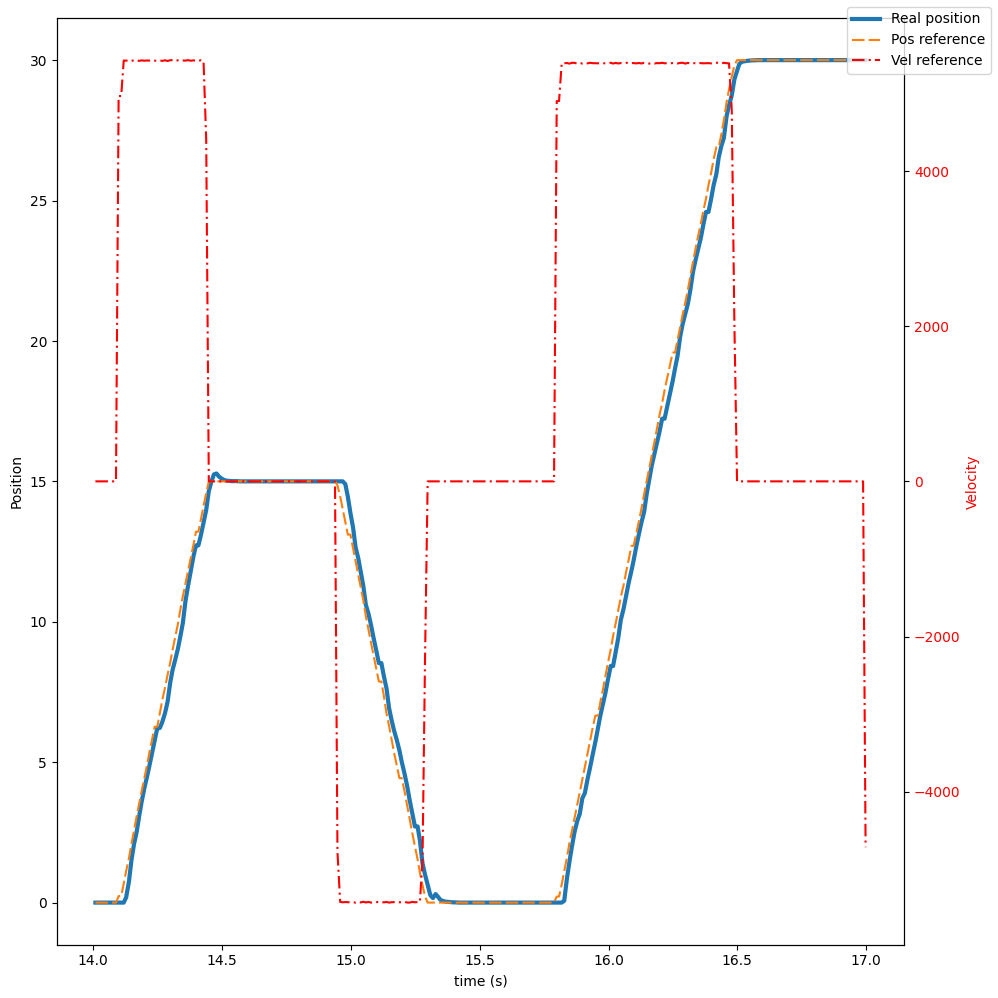

In [9]:
dataframe_x = data.loc[(data['signal'] == 'x') & (data['time'] > 14) & (data['time'] < 17)]
dataframe_x_ref = data.loc[(data['signal'] == 'x_ref') & (data['time'] > 14) & (data['time'] < 17)]
dataframe_x_vel = data.loc[(data['signal'] == 'vel_ref_x') & (data['time'] > 14) & (data['time'] < 17)]

x = dataframe_x.time
y = dataframe_x.value
x2 = dataframe_x_ref.time
y2 = dataframe_x_ref.value
x3 = dataframe_x_vel.time
y3 = dataframe_x_vel.value

# Change the default figure size

fig, ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlabel('time (s)')
# Change the default marker for the scatter from circles to x's
ax1.plot(x, y, linewidth=3, label="Real position")
ax1.plot(x2, y2, dashes=[6, 2], label="Pos reference")
ax1.set_ylabel('Position')
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
ax2.plot(x3, y3, dashes=[6, 2,1,2], color='r', label="Vel reference")
ax2.set_ylabel('Velocity', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()